In [1]:
import pandas as pd
from datasets import load_dataset

/Users/rajsilwal/anaconda3/envs/test_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

Generating train split: 100%|██████████| 785741/785741 [00:02<00:00, 265151.69 examples/s]


In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_country'].value_counts().head(20)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Canada             16029
Mexico             15139
Poland             14793
Portugal           14508
Australia          12955
South Africa       12414
Belgium            12078
Philippines        11786
Ireland            11162
Switzerland         9924
Name: count, dtype: int64

In [5]:
df['job_country'].isin(['United States'])

0          True
1         False
2         False
3          True
4         False
          ...  
785736    False
785737    False
785738    False
785739    False
785740    False
Name: job_country, Length: 785741, dtype: bool

In [6]:
us_jobs = df[df['job_country']== "United States"]

In [7]:
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]

In [8]:
us_jobs.groupby('job_title_short')[['salary_year_avg']].min()

,salary_year_avg
job_title_short,
Business Analyst,35000.0
Cloud Engineer,42000.0
Data Analyst,25000.0
Data Engineer,23496.0
Data Scientist,30000.0
Machine Learning Engineer,44408.5
Senior Data Analyst,35360.0
Senior Data Engineer,45000.0
Senior Data Scientist,55000.0


In [9]:
us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median', 'min', 'max', 'count']).sort_values('median', ascending= True)

,median,min,max,count
job_title_short,,,,
Business Analyst,90000.0,35000.0,387460.0,431
Data Analyst,90000.0,25000.0,375000.0,4350
Senior Data Analyst,110000.0,35360.0,425000.0,913
Cloud Engineer,116100.0,42000.0,221844.0,20
Data Engineer,125000.0,23496.0,525000.0,2915
Data Scientist,130000.0,30000.0,960000.0,4553
Software Engineer,130000.0,48982.0,375000.0,157
Machine Learning Engineer,150000.0,44408.5,315000.0,128
Senior Data Engineer,150000.0,45000.0,375000.0,1058


In [10]:
import matplotlib.pyplot as plt
import numpy as np

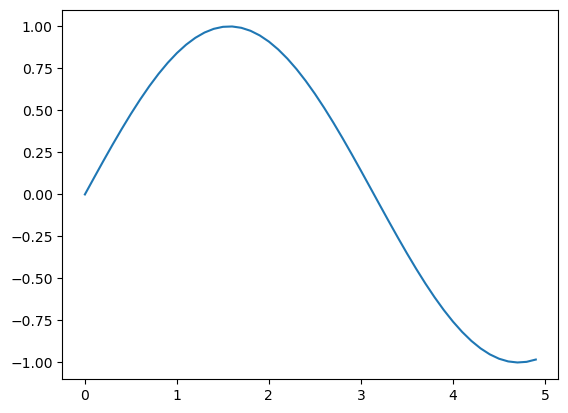

In [11]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

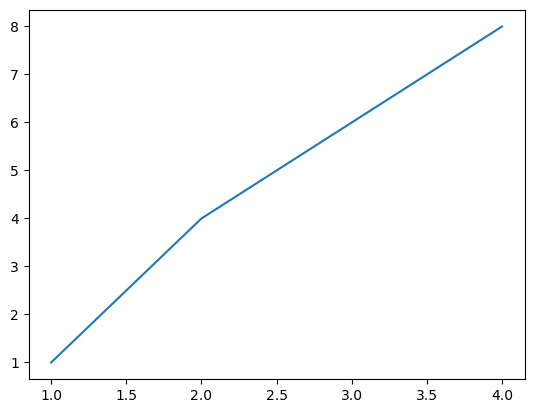

In [14]:
x = [1,2,3,4]
y = [1, 4 , 6, 8]
plt.plot(x,y)
plt.show()

In [15]:
df.job_posted_date.head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

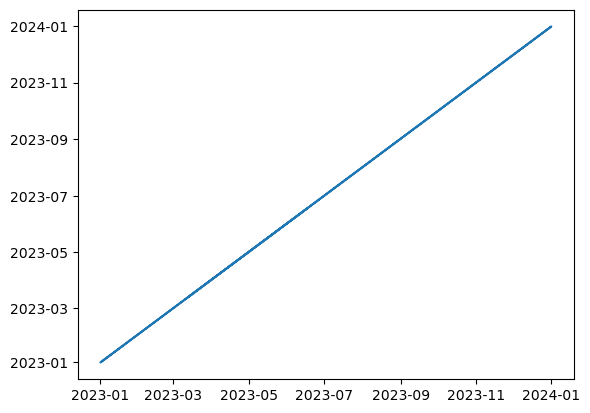

In [16]:
plt.plot(df.job_posted_date, df.job_posted_date)
plt.show()

In [17]:
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index()

In [18]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [19]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

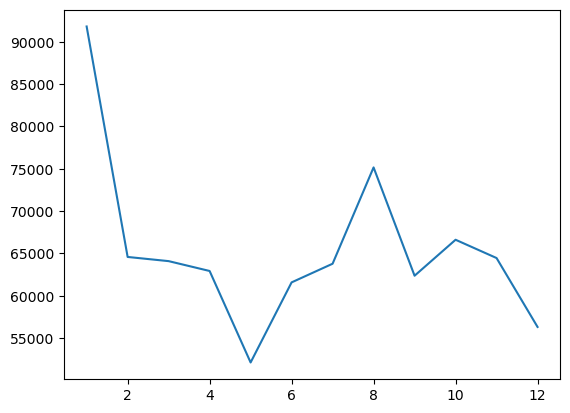

In [20]:
plt.plot(monthly_counts.index, monthly_counts.values)

In [21]:
series = pd.Series([10, 20, 30, 40], index = ['a', 'b', 'c', 'd'])

In [22]:
series.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [23]:
job_counts = df.job_title_short.value_counts()

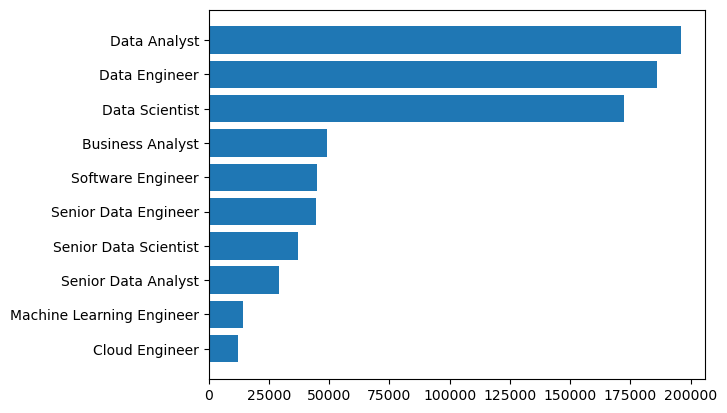

In [24]:
job_counts = job_counts.sort_values(ascending = True)
plt.barh(job_counts.index, job_counts)
plt.show()


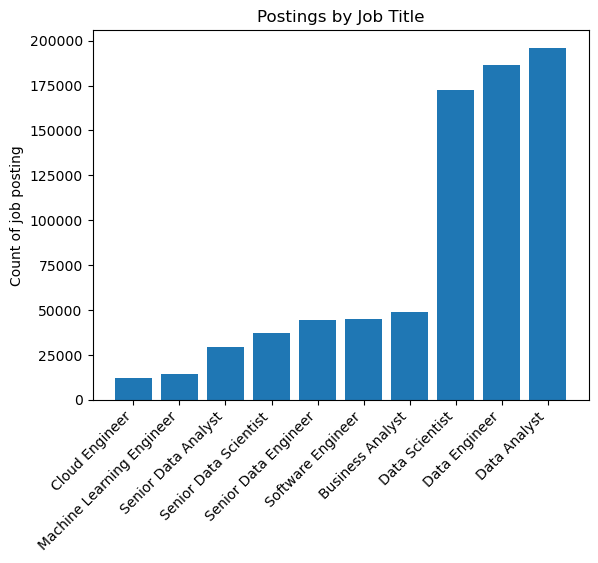

In [25]:
plt.bar(job_counts.index, job_counts)
plt.title('Postings by Job Title')
plt.ylabel('Count of job posting')
plt.xticks(rotation=45, ha='right')
plt.show()

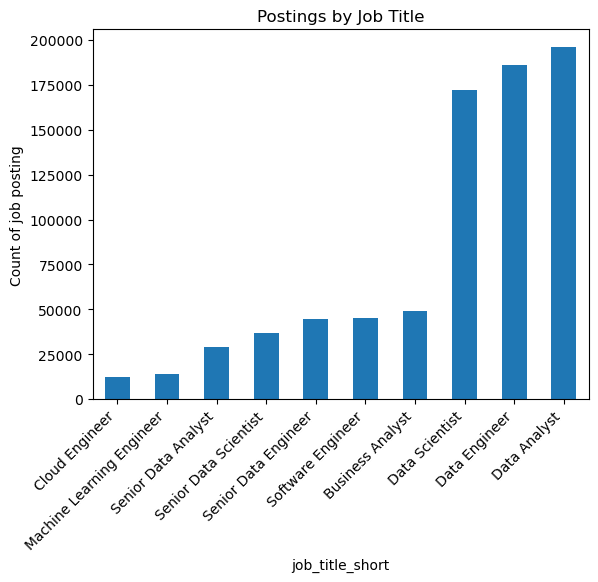

In [26]:
job_counts.plot(kind = 'bar')
plt.title('Postings by Job Title')
plt.ylabel('Count of job posting')
plt.xticks(rotation=45, ha='right')
plt.show()

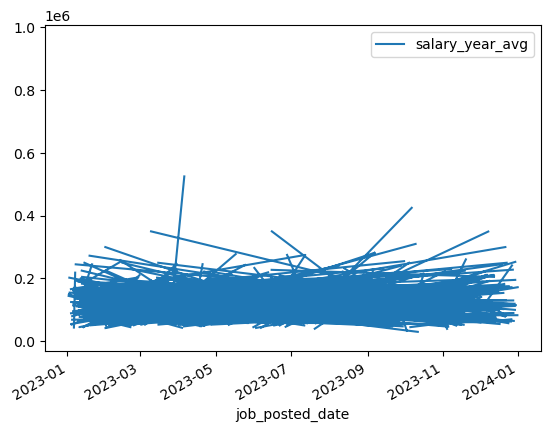

In [27]:
df.plot(x='job_posted_date', y ='salary_year_avg', kind ='line')
plt.show()